LINEAR REGRESSION

Linear Regression Evaluation:
Train R²   : 0.9854
Test R²    : 0.9777
Train RMSE : 9.7939
Test RMSE  : 10.5035
Test MAE   : 8.5836
RIDGE REGRESSION

Ridge Regression Evaluation:
Train R²   : 0.9854
Test R²    : 0.9778
Train RMSE : 9.7958
Test RMSE  : 10.4824
Test MAE   : 8.5687
LASSO REGRESSION

Lasso Regression Evaluation:
Train R²   : 0.9854
Test R²    : 0.9778
Train RMSE : 9.7954
Test RMSE  : 10.4927
Test MAE   : 8.5748
ELASTIC NET REGRESSION

ElasticNet Regression Evaluation:
Train R²   : 0.9833
Test R²    : 0.9773
Train RMSE : 10.4825
Test RMSE  : 10.6047
Test MAE   : 8.6311


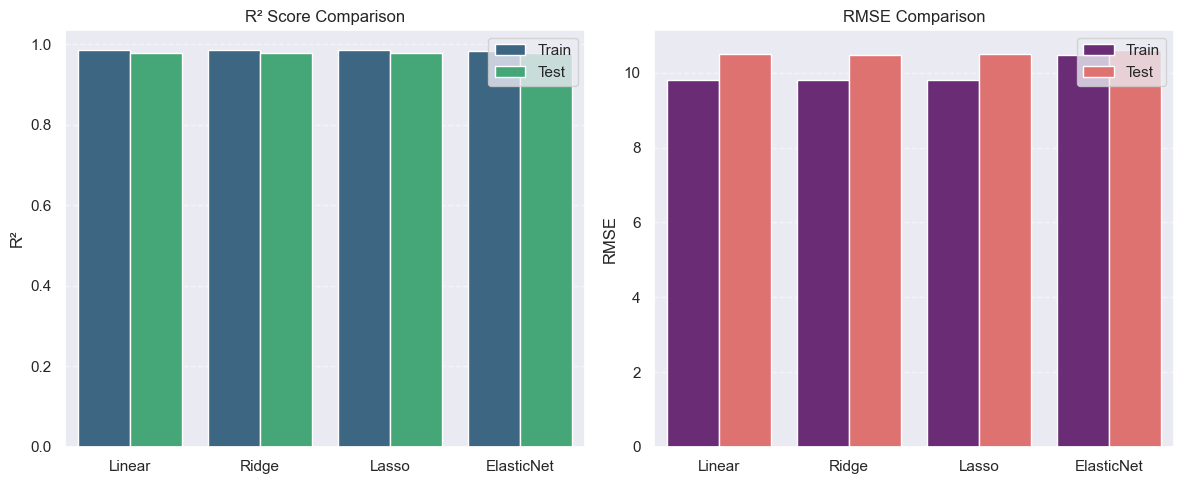

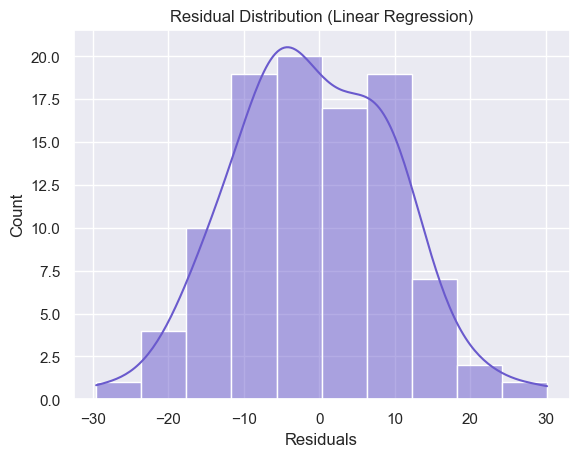

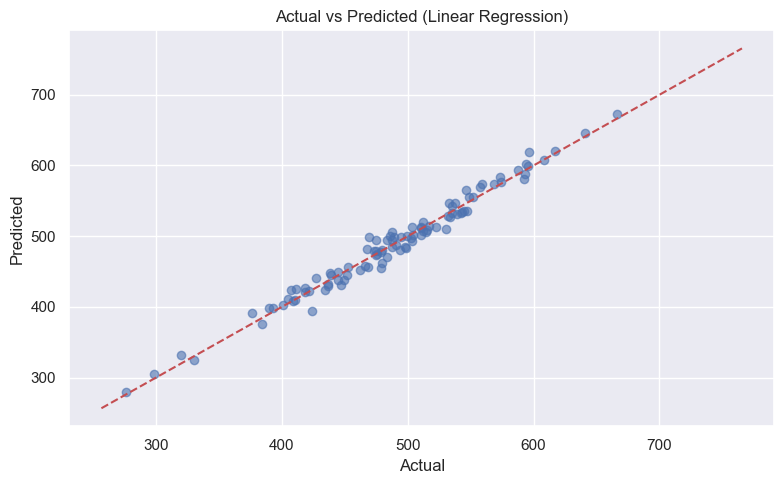

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression

#=====================================================
# Function: Evaluate model and return metrics
#=====================================================
def evaluate_model(model, X_train, X_test, y_train, y_test, name='Model'):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_pred_test)

    print(f"\n{name} Evaluation:")
    print(f"Train R²   : {train_r2:.4f}")
    print(f"Test R²    : {test_r2:.4f}")
    print(f"Train RMSE : {train_rmse:.4f}")
    print(f"Test RMSE  : {test_rmse:.4f}")
    print(f"Test MAE   : {test_mae:.4f}")

    return {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'y_pred_test': y_pred_test
    }

#=====================================================
# Load and Prepare Data
#=====================================================
df = pd.read_csv('./data/Ecommerce Customers.csv')

features = ['Avg. Session Length', 'Time on App', 'Length of Membership']
X = df[features]
y = df['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#=====================================================
# Train and Evaluate Models
#=====================================================
print("=" * 50)
print("LINEAR REGRESSION")
print("=" * 50)
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_result = evaluate_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Linear Regression')

print("=" * 50)
print("RIDGE REGRESSION")
print("=" * 50)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_result = evaluate_model(ridge_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Ridge Regression')

print("=" * 50)
print("LASSO REGRESSION")
print("=" * 50)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
lasso_result = evaluate_model(lasso_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Lasso Regression')

print("=" * 50)
print("ELASTIC NET REGRESSION")
print("=" * 50)
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio=0.5 artinya kombinasi L1 dan L2 seimbang
elastic_model.fit(X_train_scaled, y_train)
elastic_result = evaluate_model(elastic_model, X_train_scaled, X_test_scaled, y_train, y_test, 'ElasticNet Regression')

#=====================================================
# Comparison Plot (Train & Test R² / RMSE)
#=====================================================
models = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']
train_r2s = [lr_result['train_r2'], ridge_result['train_r2'], lasso_result['train_r2'], elastic_result['train_r2']]
test_r2s = [lr_result['test_r2'], ridge_result['test_r2'], lasso_result['test_r2'], elastic_result['test_r2']]
train_rmses = [lr_result['train_rmse'], ridge_result['train_rmse'], lasso_result['train_rmse'], elastic_result['train_rmse']]
test_rmses = [lr_result['test_rmse'], ridge_result['test_rmse'], lasso_result['test_rmse'], elastic_result['test_rmse']]

# R² Comparison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=models * 2, y=train_r2s + test_r2s,
            hue=["Train"] * 4 + ["Test"] * 4,
            palette="viridis")
plt.title("R² Score Comparison")
plt.ylabel("R²")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# RMSE Comparison
plt.subplot(1, 2, 2)
sns.barplot(x=models * 2, y=train_rmses + test_rmses,
            hue=["Train"] * 4 + ["Test"] * 4,
            palette="magma")
plt.title("RMSE Comparison")
plt.ylabel("RMSE")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#=====================================================
# Residual Analysis (Linear Regression)
#=====================================================
residuals = y_test - lr_result['y_pred_test']
sns.histplot(residuals, kde=True, color='slateblue')
plt.title('Residual Distribution (Linear Regression)')
plt.xlabel('Residuals')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(y_test, lr_result['y_pred_test'], alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs Predicted (Linear Regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1000 non-null   int64  
 1   Gender                    1000 non-null   object 
 2   Heart_Rate                1000 non-null   float64
 3   Blood_Pressure_Systolic   1000 non-null   float64
 4   Blood_Pressure_Diastolic  1000 non-null   float64
 5   Stress_Level_Biosensor    1000 non-null   float64
 6   Stress_Level_Self_Report  1000 non-null   float64
 7   Physical_Activity         1000 non-null   object 
 8   Sleep_Quality             1000 non-null   object 
 9   Mood                      1000 non-null   object 
 10  Study_Hours               1000 non-null   float64
 11  Project_Hours             1000 non-null   float64
 12  Health_Risk_Level         1000 non-null   object 
dtypes: float64(7), int64(1), object(5)
memory usage: 101.7+ KB

Data

/tmp/ipykernel_15772/2219051837.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_model, x='Health_Risk_Level', palette='Set2')


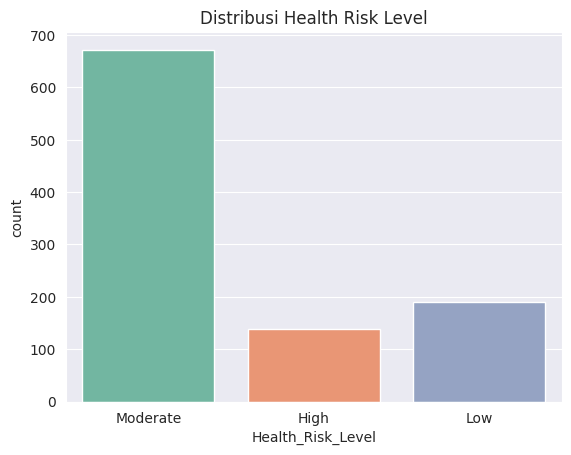

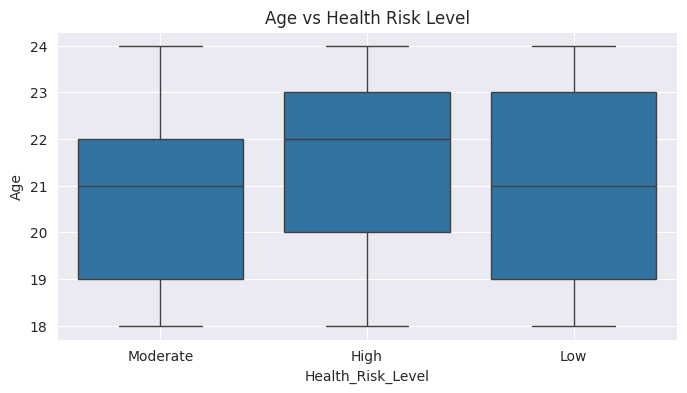

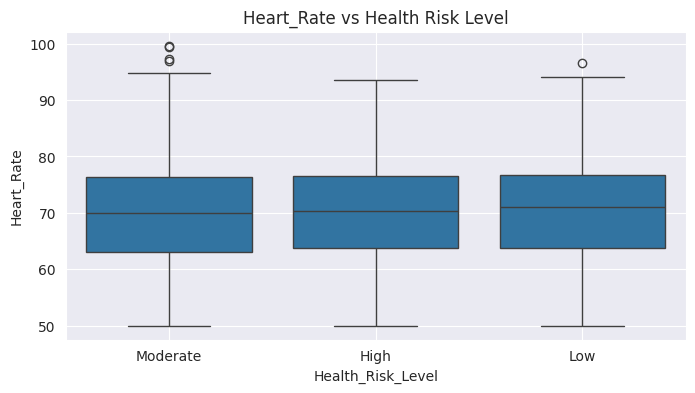

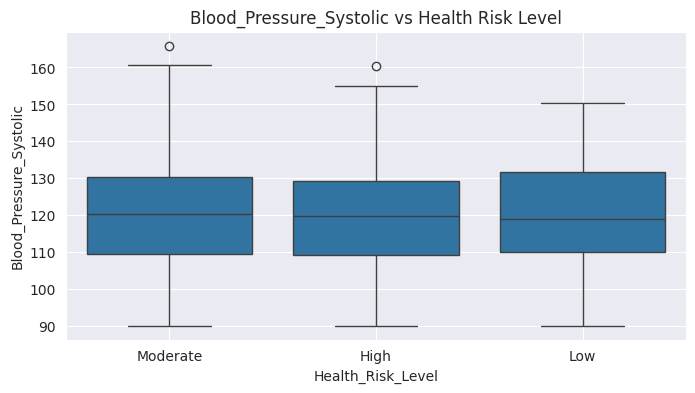

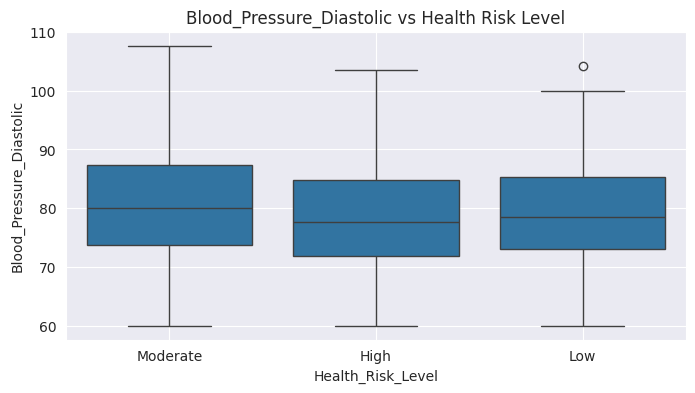

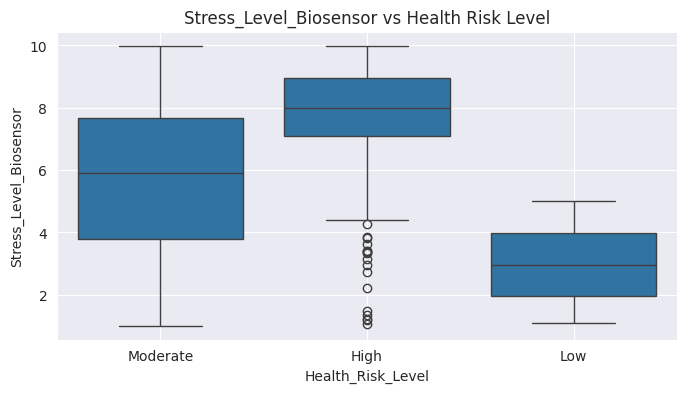

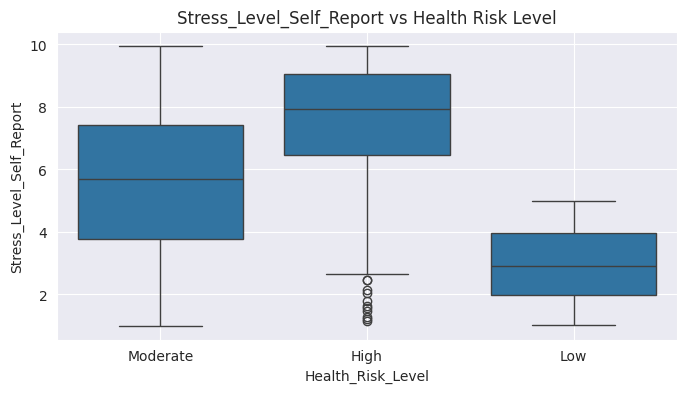

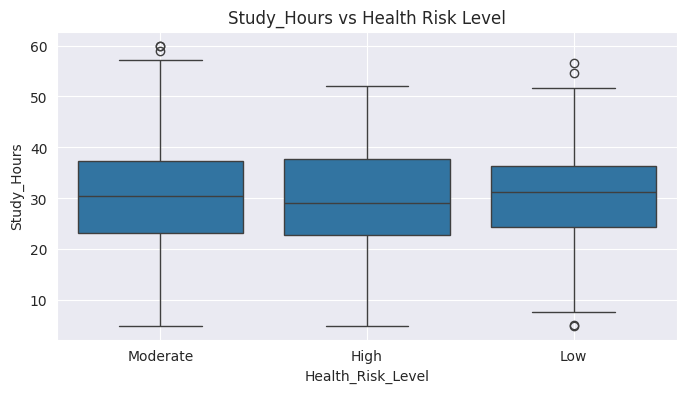

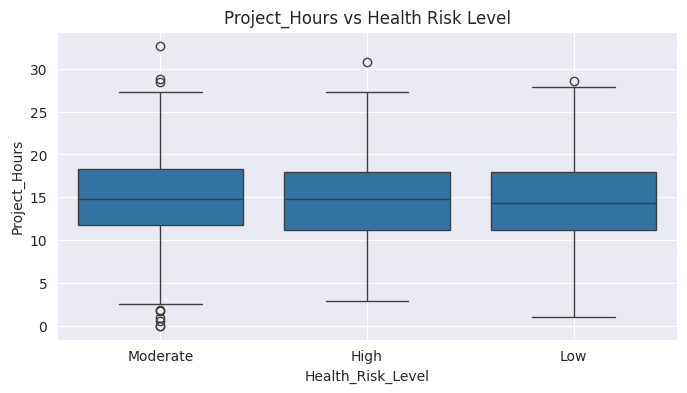

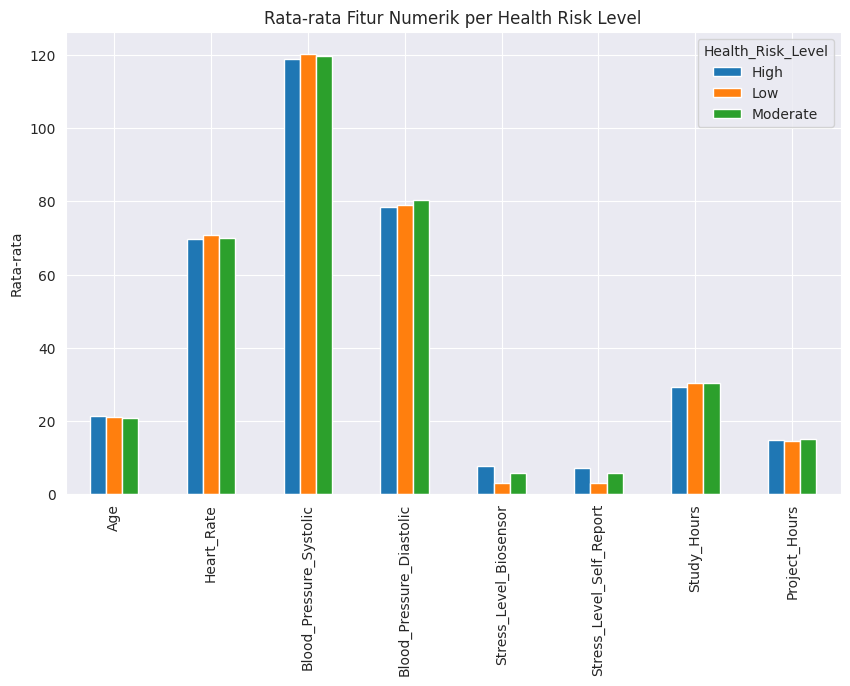

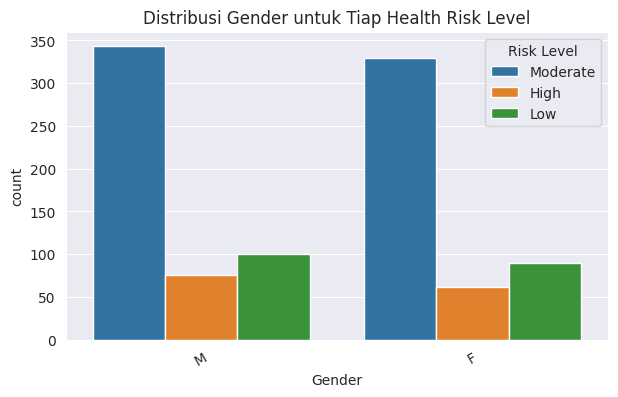

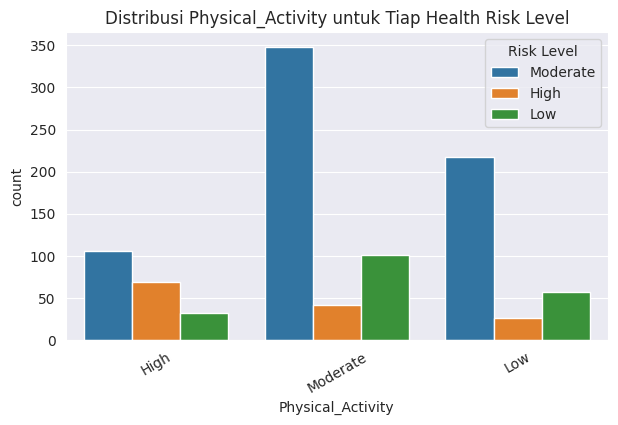

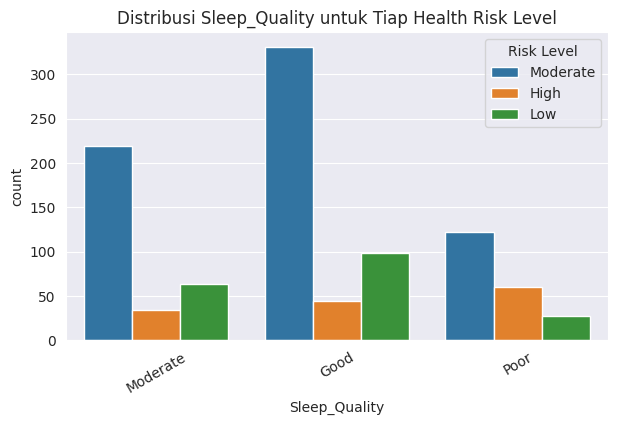

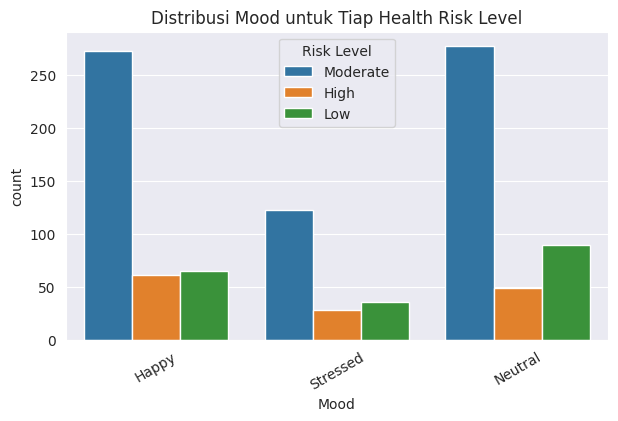

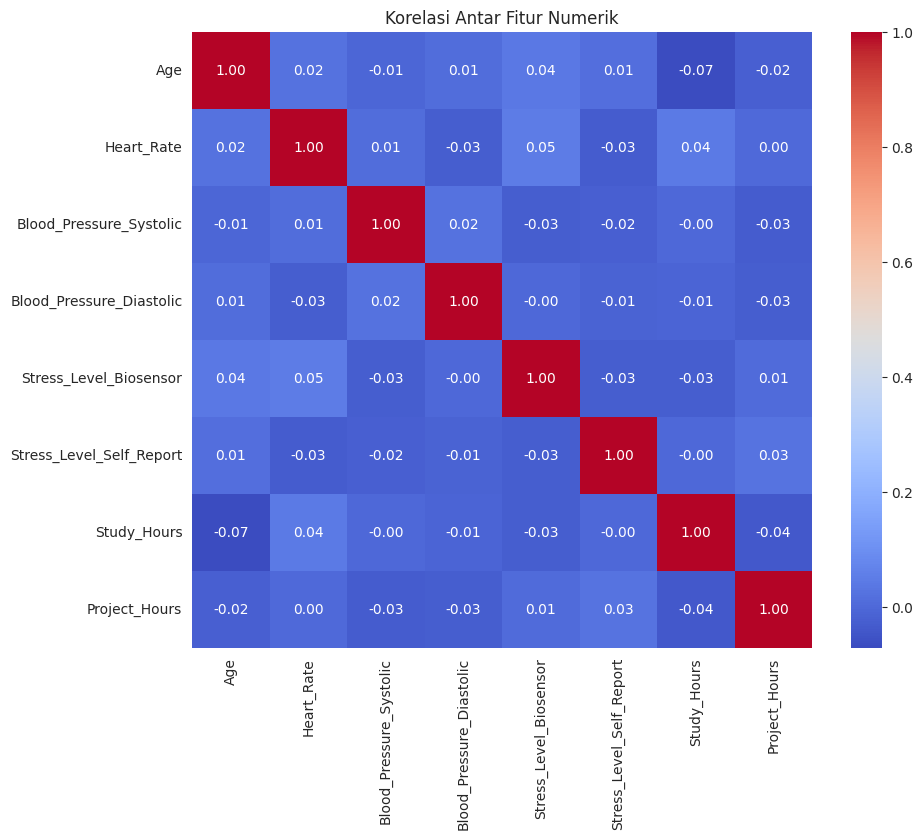

Train: (699, 42), Val: (151, 42), Test: (150, 42)
[NO PENALTY] Validation Accuracy: 1.0000
[L2 PENALTY] Validation Accuracy: 1.0000

🔍 Calculating VIF without statsmodels...

📌 Features with high multicollinearity (VIF > 10):
                               feature        VIF
2              Blood_Pressure_Systolic        inf
3             Blood_Pressure_Diastolic        inf
4               Stress_Level_Biosensor        inf
5             Stress_Level_Self_Report        inf
6                          Study_Hours        inf
7                        Project_Hours        inf
8                           Stress_Gap        inf
10                  Blood_Pressure_Avg        inf
12                   Total_Study_Hours        inf
14                          Mood_Score        inf
16                      Activity_Level        inf
15                         Sleep_Score        inf
17                            Gender_F        inf
18                            Gender_M        inf
22                  Slee

In [27]:
# ======================== 1. Import Library ============================= #
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Alternative VIF calculation without statsmodels
def calculate_vif(X):
    """Calculate VIF manually without statsmodels dependency"""
    vif_data = pd.DataFrame()
    vif_data['feature'] = X.columns
    vif_data['VIF'] = np.nan
    
    for i in range(X.shape[1]):
        # For each feature, calculate R-squared when regressing it against all other features
        y = X.iloc[:, i]
        X_others = X.drop(X.columns[i], axis=1)
        
        # Add constant term manually
        X_others_with_const = np.column_stack([np.ones(len(X_others)), X_others])
        
        try:
            # Use linear regression to calculate R-squared
            from sklearn.linear_model import LinearRegression
            lr = LinearRegression()
            lr.fit(X_others, y)
            r_squared = lr.score(X_others, y)
            
            # VIF = 1 / (1 - R²)
            if r_squared < 0.999:  # Avoid division by zero
                vif_data.loc[i, 'VIF'] = 1 / (1 - r_squared)
            else:
                vif_data.loc[i, 'VIF'] = np.inf
        except:
            vif_data.loc[i, 'VIF'] = np.nan
    
    return vif_data

# ======================== 2. Load Dataset ============================== #
df = pd.read_csv('./data/student_health_data.csv')

# ======================== 3. Drop Kolom ID ============================= #
df_model = df.drop('Student_ID', axis=1).copy()

# ======================== 4. Info Data ================================ #
df_model.info()
print(f"\nData Deskriptif:\n{df_model.describe()}")
print(f"\nMissing Values:\n{df_model.isnull().sum()}")

# ======================== 5. Visualisasi Dasar ======================== #
sns.set_style('darkgrid')
sns.countplot(data=df_model, x='Health_Risk_Level', palette='Set2')
plt.title('Distribusi Health Risk Level')
plt.show()

numerics = ['Age', 'Heart_Rate', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
            'Stress_Level_Biosensor', 'Stress_Level_Self_Report', 'Study_Hours', 'Project_Hours']

for col in numerics:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df_model, x='Health_Risk_Level', y=col)
    plt.title(f'{col} vs Health Risk Level')
    plt.grid(True)
    plt.show()

df_model.groupby('Health_Risk_Level')[numerics].mean().T.plot(kind='bar', figsize=(10,6))
plt.title("Rata-rata Fitur Numerik per Health Risk Level")
plt.ylabel("Rata-rata")
plt.grid(True)
plt.show()

categoricals = ['Gender', 'Physical_Activity', 'Sleep_Quality', 'Mood']
for col in categoricals:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df_model, x=col, hue='Health_Risk_Level')
    plt.title(f'Distribusi {col} untuk Tiap Health Risk Level')
    plt.xticks(rotation=30)
    plt.legend(title='Risk Level')
    plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df_model[numerics].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

# ======================== 6. Feature Engineering ======================= #
df_model['Stress_Gap'] = df_model['Stress_Level_Biosensor'] - df_model['Stress_Level_Self_Report']
df_model['Stress_Agreement'] = (df_model['Stress_Gap'].abs() < 2).astype(int)
df_model['Blood_Pressure_Avg'] = (df_model['Blood_Pressure_Systolic'] + df_model['Blood_Pressure_Diastolic']) / 2
df_model['BP_Ratio'] = df_model['Blood_Pressure_Systolic'] / (df_model['Blood_Pressure_Diastolic'] + 1e-5)
df_model['Total_Study_Hours'] = df_model['Study_Hours'] + df_model['Project_Hours']
df_model['Study_Stress_Ratio'] = df_model['Total_Study_Hours'] / (df_model['Stress_Level_Biosensor'] + 1)
df_model['Age_Group'] = pd.cut(df_model['Age'], bins=[0, 17, 21, 25, 30], labels=['<18', '18-21', '22-25', '26+'])

mood_map = {'Sad': 0, 'Neutral': 1, 'Happy': 2}
sleep_map = {'Poor': 0, 'Average': 1, 'Good': 2}
activity_map = {'Low': 0, 'Moderate': 1, 'High': 2}

df_model['Mood_Score'] = df_model['Mood'].map(mood_map)
df_model['Sleep_Score'] = df_model['Sleep_Quality'].map(sleep_map)
df_model['Activity_Level'] = df_model['Physical_Activity'].map(activity_map)
df_model['Mood_Sleep_Combo'] = df_model['Mood'] + "_" + df_model['Sleep_Quality']
df_model['Is_At_Risk'] = df_model['Health_Risk_Level'].isin(['High', 'Medium']).astype(int)

# ======================== 7. Imputasi ============================ #
df_model['Mood_Score'] = df_model['Mood_Score'].fillna(df_model['Mood_Score'].mode()[0])
df_model['Sleep_Score'] = df_model['Sleep_Score'].fillna(df_model['Sleep_Score'].mode()[0])
df_model['Study_Stress_Ratio'] = df_model['Study_Stress_Ratio'].fillna(df_model['Study_Stress_Ratio'].mean())

# ======================== 8. Encoding & Scaling ============================ #
target = 'Is_At_Risk'
X = df_model.drop(columns=[target])
y = df_model[target]

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat_encoded = encoder.fit_transform(X[categorical_features])
encoded_col_names = encoder.get_feature_names_out(categorical_features)
df_cat_encoded = pd.DataFrame(X_cat_encoded, columns=encoded_col_names, index=X.index)

scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X[numeric_features])
df_num_scaled = pd.DataFrame(X_num_scaled, columns=numeric_features, index=X.index)

X_final = pd.concat([df_num_scaled, df_cat_encoded], axis=1)

X_temp, X_test, y_temp, y_test = train_test_split(X_final, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp)
print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

# ========================== MODEL ========================== #
logreg_no_penalty = LogisticRegression(penalty=None, max_iter=1000, solver='lbfgs')
logreg_no_penalty.fit(X_train, y_train)
acc_no_penalty = logreg_no_penalty.score(X_val, y_val)
print(f"[NO PENALTY] Validation Accuracy: {acc_no_penalty:.4f}")

logreg_l2 = LogisticRegression(penalty='l2', max_iter=1000, solver='lbfgs')
logreg_l2.fit(X_train, y_train)
acc_l2 = logreg_l2.score(X_val, y_val)
print(f"[L2 PENALTY] Validation Accuracy: {acc_l2:.4f}")

# ========================== VIF (Alternative Implementation) ========================== #
print("\n🔍 Calculating VIF without statsmodels...")
vif_data = calculate_vif(X_train)
high_vif = vif_data[vif_data['VIF'] > 10].sort_values('VIF', ascending=False)
print("\n📌 Features with high multicollinearity (VIF > 10):")
print(high_vif)

# Additional correlation analysis as backup
print("\n📊 High correlation pairs (|correlation| > 0.8):")
corr_matrix = X_train.corr()
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append({
                'feature1': corr_matrix.columns[i],
                'feature2': corr_matrix.columns[j],
                'correlation': corr_matrix.iloc[i, j]
            })

if high_corr_pairs:
    corr_df = pd.DataFrame(high_corr_pairs)
    print(corr_df.sort_values('correlation', key=abs, ascending=False))
else:
    print("No highly correlated feature pairs found.")